In [ ]:
import pandas as pd

df_og = pd.read_csv("cleanest_mummy_df.csv")

display(df_og)

,Unnamed: 0,squarenorthsouth,headdirection,sex,northsouth,depth,eastwest,adultsubadult,facebundles,southtohead,...,sciaticnotch,supraorbitalridges,orbitedge,toothattrition,sphenooccipitalsynchondrosis,parietalblossing,observations,humerus,tootheruptionageestimation,zygomaticcrest
0,0,200,E,Unknown,N,1.60,E,A,Unknown,3.08,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
1,1,200,W,Unknown,N,1.58,E,A,Unknown,3.78,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
2,2,200,Unknown,Unknown,N,1.27,E,Unknown,Unknown,0.37,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
3,3,200,W,Unknown,N,0.85,E,A,Y,3.82,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
4,4,200,W,Unknown,N,0.85,E,A,Y,3.82,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,150,W,Unknown,N,1.00,W,C,Unknown,1.00,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
1254,1254,150,W,Unknown,N,1.00,W,C,Unknown,1.00,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
1255,1255,150,Unknown,Unknown,N,1.40,W,C,Unknown,0.00,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown
1256,1256,200,E,Unknown,N,1.60,E,A,Unknown,3.08,...,unknown,unknown,unknown,0.0,Unknown,Unknown,None,Unknown,Unknown,unknown


In [ ]:
df_filtered = df_og.copy()

df_filtered.drop(df_filtered[df_filtered['headdirection'] == 'Unknown'].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['headdirection'] == 'I'].index, inplace=True)
df_filtered.drop(df_filtered[df_filtered['headdirection'] == 'N LL'].index, inplace=True)

columns = [ 'Unnamed: 0',
            'area',
            'notes', 
            'haircolor', 
            'text', 
            'fieldbookpage', 
            'burialnumber', 
            'burialnumber-2', 
            'preservation', 
            'photographeddate',
            'description',
            'fieldbookexcavationyear',
            'locale',
            'clusternumber',
            'date',
            'doneby',
            'dataexpertinitials',
            'samplescollected',
            'dimension_value',
            'perservationindex',
            'observations',
            'westtohead',
            'southtohead',
            'westtofeet',
            'southtofeet',
            'squarenorthsouth',
            'northsouth',
            'eastwest',
            'squareeastwest',
            'femur',
            'humerusheaddiameter',
            'squamossuture',
            'caries_periodontal_disease',
            'medical_ip_ramus',
            'gonion',
            'humeruslength',
            'femurlength',
            'lambdoidsuture',
            'ventralarc',
            'nuchalcrest',
            'osteophytosis',
            'subpubicangle',
            'robust',
            'femurheaddiameter',
            'sciaticnotch',
            'supraorbitalridges',
            'orbitedge',
            'toothattrition',
            'sphenooccipitalsynchondrosis',
            'parietalblossing',
            'humerus',
            'tootheruptionageestimation',
            'zygomaticcrest'
            ]

df_filtered = df_filtered.drop(columns, axis=1)
df_filtered['headdirection'].unique()

array(['E', 'W'], dtype=object)

In [ ]:
df_filtered.nunique()

headdirection               2
sex                         3
depth                     173
adultsubadult               3
facebundles                 3
goods                       2
wrapping                    4
length                    128
ageatdeath                  5
analysistype                3
decoration_value            4
dimensiontype              12
structure_value             6
color_value                 4
textile_function_value      6
thickness                   4
angle                       5
material                    3
count                      20
component                  16
ply                         3
stitch_direction            5
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:

df2 = df_filtered.copy()

for col in df2:
  if not pd.api.types.is_numeric_dtype(df2[col]) and col != 'headdirection':
    df2 = pd.get_dummies(df2, columns=[col])

display(df2.head())

,headdirection,depth,length,analysistype,count,sex_F,sex_M,sex_Unknown,adultsubadult_A,adultsubadult_C,...,component_Smaller basket weave,component_Smaller. Sewn onto larger.,ply_D,ply_None,ply_S,stitch_direction_None,stitch_direction_S,stitch_direction_S-twist,stitch_direction_Z,stitch_direction_Z/S
0,E,1.60,1.64,1.0,12,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
1,W,1.58,1.66,1.0,10,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,W,0.85,1.80,1.0,10,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,W,0.85,1.80,1.0,10,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
5,W,0.85,1.80,1.0,10,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
y = df2['headdirection'] # Label
X = df2.drop(columns=['headdirection']) # Features
X.head()

# Split the y and X sets into training and testing sets. 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the labels for test dataset
y_pred = clf.predict(X_test)

# View the predicted versus actual in a DataFrame
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.head(10)

,Actual,Predicted
930,E,W
1242,E,E
947,W,W
1029,W,W
403,W,W
898,W,W
205,W,W
477,E,W
242,W,W
965,W,W


In [27]:
import sklearn.linear_model as lm, pandas as pd, sklearn.ensemble as se, numpy as np
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score

max_accuracy = 0
for n in range(1, 20):
    for d in range(1, 30):
        rf = se.RandomForestClassifier(n_estimators=n, max_depth=d, random_state=12345)
        rf = rf.fit(df2.drop(columns=['headdirection']), df2['headdirection'])
        score = np.mean(cross_val_score(rf, df2.drop(columns=['headdirection']), df2['headdirection'], scoring='accuracy', cv=10, n_jobs=-1))
        
        if score > max_accuracy:
            max_r2 = score
            best_model = rf

# create a list of feature names
feature_names = list(df2.columns)

# create a list of feature importances
feature_importances = list(clf.feature_importances_)

# create a list of tuples with feature names and feature importances
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, feature_importances)]

# sort the feature importances in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print the feature importances
print(max_accuracy)
print(len(feature_importances))
print(best_model.get_params())

0
92
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 29, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 0, 'warm_start': False}


In [32]:
top_15_features = [feature_importances[i][0] for i in range(15)]

# use the top 20 features to make a new dataframe
top_15_df = df2[top_15_features]
top_15_df.columns

Index(['headdirection', 'depth', 'sex_Unknown', 'sex_M', 'goods_Yes',
       'wrapping_Unknown', 'ageatdeath_A', 'length', 'adultsubadult_C',
       'ageatdeath_I', 'ageatdeath_N', 'count', 'sex_F', 'wrapping_B',
       'wrapping_W'],
      dtype='object')

In [33]:
y = top_15_df['headdirection'] # Label
X = top_15_df.drop(columns=['headdirection']) # Features
X.head()

# Split the y and X sets into training and testing sets. 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the labels for test dataset
y_pred = clf.predict(X_test)

# View the predicted versus actual in a DataFrame
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.head(10)

,Actual,Predicted
930,E,W
1242,E,E
947,W,W
1029,W,W
403,W,W
898,W,W
205,W,W
477,E,W
242,W,W
965,W,W


In [37]:
import pickle

with open('model.pkl','wb') as file:
  pickle.dump(clf, file)

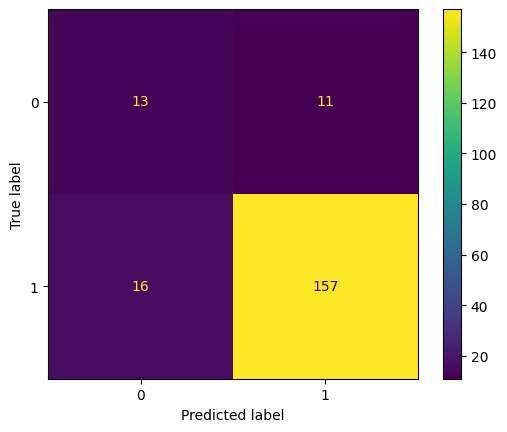

In [34]:
from sklearn import metrics
from matplotlib import pyplot as plt


cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot(values_format='d')
plt.show()

In [35]:
y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)
  
# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")
  
# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test_dummies['W'], y_pred_dummies['W'])}")
  
# Recall    = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test_dummies['W'], y_pred_dummies['W'])}")
  
# F1        = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test_dummies['W'], y_pred_dummies['W'])}")

Accuracy:	0.8629441624365483
Precision:	0.9345238095238095
Recall:		0.9075144508670521
F1:		0.9208211143695015


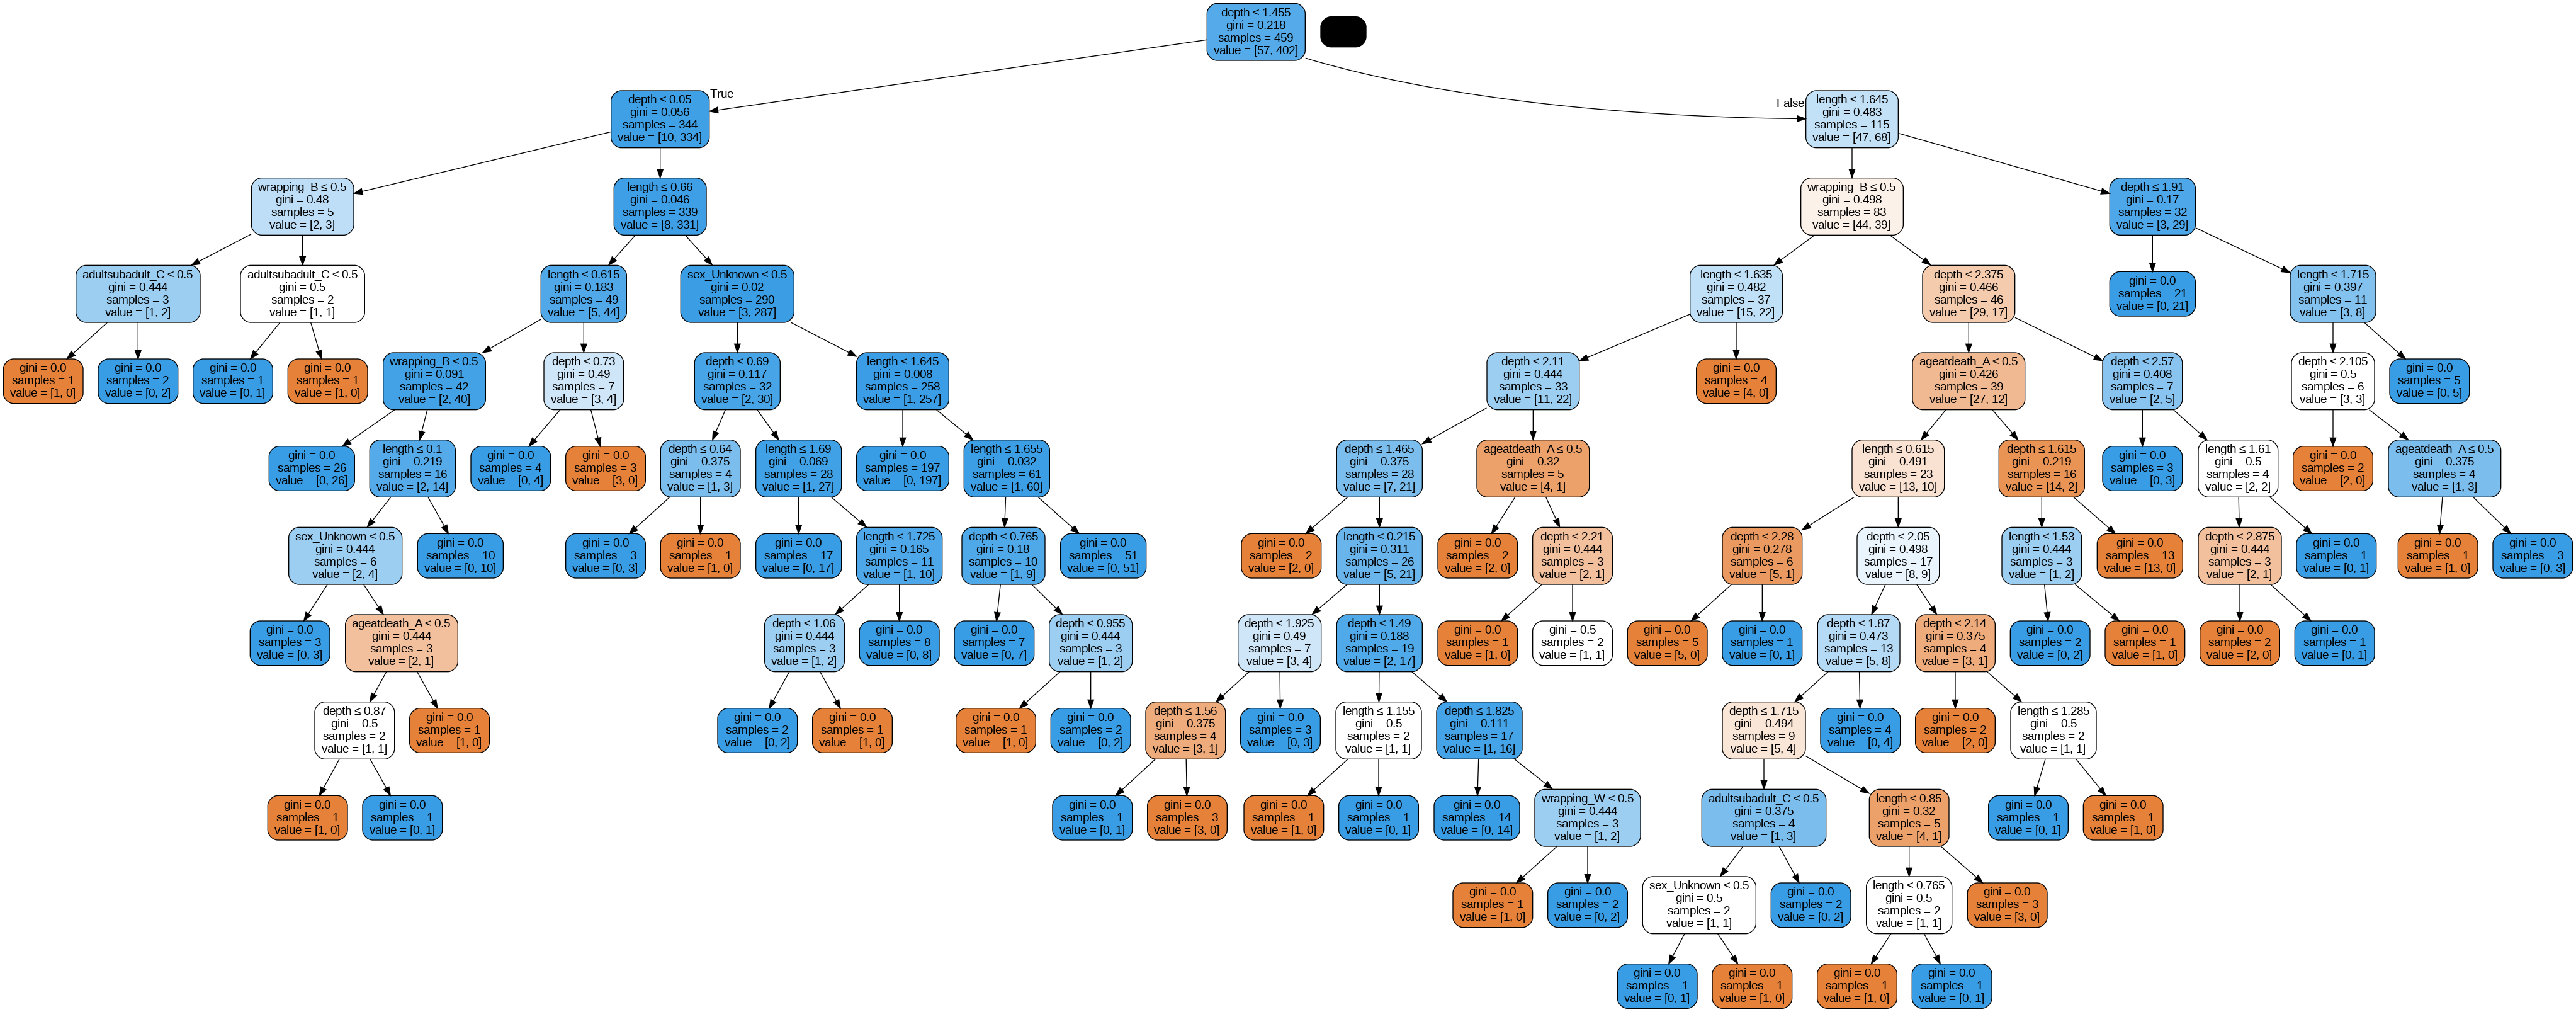

In [36]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('head-direction.png')
Image(graph.create_png())